# Principle Component Analysis Using Python



[Course Module: Applied Data Analysis for Atmospheric Sciences Using Python]





----------------------------------

November 2018
Ting-Shuo Yo

# Outline

- What is PCA?
- Some Simple Examples
- Perform PCA with Python
  - [MNIST dataset](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)

# 主成分分析 (Principle Component Analysis, PCA)

- 主成分分析是很常用的一種探索式資料分析(exploratory analysis)工具，這個數學工具協助我們計算**資料本身的變異**，找出資料本身變化的主要特徵，也就是**主成分（principle component, PC）**，讓我們可以很快的檢視資料裡相對較為特殊的狀態（pattern），並且達到減少資料集維度的效果。

<img src='figures/GaussianScatterPCA.png' align='center' width='400'/>

# PCA is more than 100 years old

- 主成分分析是 1901 由 Karl Pearson 所提出，用於分析數據及建立數理模型。
- 其方法主要是通過對共變異數矩陣進行特徵分解（eigen decomposition），以得出數據的主成分（即特徵向量）與它們的權值（即特徵值）。
- PCA是以特徵量分析多元統計分布的方法中最基本的一種。
- 其結果可以理解為對原數據中的變異數做出解釋：哪一個方向上的數據值對變異數的影響最大？

<img src='figures/Karl_Pearson_1912.jpg' align='right' height='220' />

# Mathematics of PCA

- 我們總共有 $N$ 筆觀測資料，$X = \{x_i\}_{i=1,..,N} = \{x_1, x_2, ..., x_N\}$
- 我們的每個觀測包含了 $M$ 個變量，所以每個觀測可以用 $x_i = \{x_{i1}, x_{i2}, ..., x_{iM}\}$ 來表示
- 如此， $X = \{ x_{ij}\}_{i=1,..,N, j=1,...,M}$
- 我們希望找到一組 $Y = \{Y_1, Y_2, ..., Y_M\}$，滿足以下條件：
  - $Y = \Sigma_{i=1}^{M} a_i * X_i$
  - $Y$ 依照可以解釋 $X$ 變異量的大小排序，如此，我們可以用少數 $K$ 個 $Y$，來代表大部分 $X$ 的變化。
- 在數學上，我們可以證明 $X$ 的共變數矩陣的 eigen vectors 滿足以上的條件。 
- And we will stop right here.


# 100 多年來的補充

- From eigen decomposition to Singular Value Decomposition (SVD)
  - To overcome unsolvable data matrix
- How to handle very big N: 
  - incremental PCA (online PCA)
- How to handle very big M: 
  - randomized PCA


## A Very Simple Example

讓我們來看看 PCA 的實際操作

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

首先，我們製作一個 6\*2 的矩陣

In [2]:
# Let's create a 6x2 matrix as an example
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
print(X)

[[-1 -1]
 [-2 -1]
 [-3 -2]
 [ 1  1]
 [ 2  1]
 [ 3  2]]


我們可以從資料的散佈圖看得出來，這是一個很接近一條斜線的分佈。

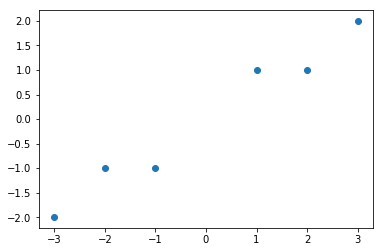

In [3]:
# A quick scatter plot
plt.scatter(X[:,0], X[:,1])

讓我們用這組資料來進行 PCA

In [4]:
# Initialize a PCA objetc with 2 PCs
pca = PCA(n_components=2)
# Use the prepraed data for calculation
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

這樣就做完了。

讓我們來看看計算的結果：

In [5]:
# The proportion of variance explained by each PC
print(pca.explained_variance_ratio_)

[0.99244289 0.00755711]


In [6]:
# The eigen values
print(pca.singular_values_)

[6.30061232 0.54980396]


In [7]:
# The PCs, i.e., eigen vectors
print(pca.components_)

[[-0.83849224 -0.54491354]
 [ 0.54491354 -0.83849224]]


只看數字，似乎不太容易理解發生了什麼事情，讓我們把這些數字畫出來：

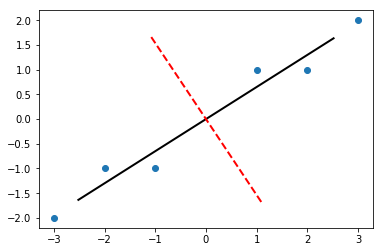

In [8]:
# Another way to do scatter plot
plt.plot(X[:,0], X[:,1],'o')
# Add PC1 as blue solid line
plt.plot(pca.components_[0][0]*np.array([3,-3]),pca.components_[0][1]*np.array([3,-3]),'k-', lw=2)
# Add PC2 as red dashed line
plt.plot(pca.components_[1][0]*np.array([2,-2]),pca.components_[1][1]*np.array([2,-2]),'r--', lw=2)
plt.show()

## A More Complicated Example

剛剛的例子，是把二維的資料降低成一維，我們再來看看另一組三維資料的例子（來源：[scikit-learn](https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_3d.html#sphx-glr-auto-examples-decomposition-plot-pca-3d-py)）

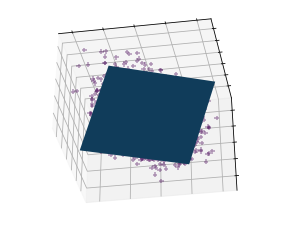

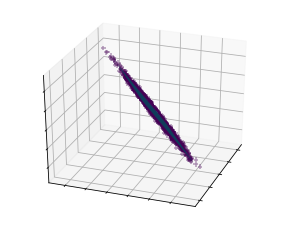

In [9]:
# Authors: Gael Varoquaux
#          Jaques Grobler
#          Kevin Hughes
# License: BSD 3 clause

from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


# #############################################################################
# Create the data

e = np.exp(1)
np.random.seed(4)


def pdf(x):
    return 0.5 * (stats.norm(scale=0.25 / e).pdf(x)
                  + stats.norm(scale=4 / e).pdf(x))

y = np.random.normal(scale=0.5, size=(30000))
x = np.random.normal(scale=0.5, size=(30000))
z = np.random.normal(scale=0.1, size=len(x))

density = pdf(x) * pdf(y)
pdf_z = pdf(5 * z)

density *= pdf_z

a = x + y
b = 2 * y
c = a - b + z

norm = np.sqrt(a.var() + b.var())
a /= norm
b /= norm


# #############################################################################
# Plot the figures
def plot_figs(fig_num, elev, azim):
    fig = plt.figure(fig_num, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=elev, azim=azim)

    ax.scatter(a[::10], b[::10], c[::10], c=density[::10], marker='+', alpha=.4)
    Y = np.c_[a, b, c]

    # Using SciPy's SVD, this would be:
    # _, pca_score, V = scipy.linalg.svd(Y, full_matrices=False)

    pca = PCA(n_components=3)
    pca.fit(Y)
    pca_score = pca.explained_variance_ratio_
    V = pca.components_

    x_pca_axis, y_pca_axis, z_pca_axis = 3 * V.T
    x_pca_plane = np.r_[x_pca_axis[:2], - x_pca_axis[1::-1]]
    y_pca_plane = np.r_[y_pca_axis[:2], - y_pca_axis[1::-1]]
    z_pca_plane = np.r_[z_pca_axis[:2], - z_pca_axis[1::-1]]
    x_pca_plane.shape = (2, 2)
    y_pca_plane.shape = (2, 2)
    z_pca_plane.shape = (2, 2)
    ax.plot_surface(x_pca_plane, y_pca_plane, z_pca_plane)
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])


elev = -40
azim = -80
plot_figs(1, elev, azim)

elev = 30
azim = 20
plot_figs(2, elev, azim)

plt.show()

## A Real World Example: 花蓮測站的 PM2.5

我們在資料清理的課程中，使用了環保署測站的資料作為示範，我們接下來用相同的資料來示範 PCA 的使用。

首先，我們要讀進原始資料，然後加以清理。

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

def detect_epa_nan(x):
    ''' Search for missing value symbol and assign np.nan '''
    if re.findall('\#|\*|x', str(x))!=[]:
        return(np.nan)
    else:
        return(x)

def detect_epa_norain(x):
    ''' Replace 'NR' (no-rain) with 0 '''
    if str(x)=='NR':
        return(0)
    else:
        return(x)

def clean_epa_station(x):
    ''' Clean up a EPA station dataset '''
    # Rename columns
    col_names = ['date','station','item','h00','h01','h02','h03','h04','h05','h06','h07','h08','h09',
                'h10','h11','h12','h13','h14','h15','h16','h17','h18','h19','h20','h21','h22','h23']
    x.columns = col_names
    # Process NA and NR
    floatdata = x.iloc[:,3:]
    floatdata = floatdata.applymap(detect_epa_nan)
    floatdata = floatdata.applymap(detect_epa_norain)
    floatdata.astype(np.float32)
    x.iloc[:,3:] = floatdata
    # Done
    return(x)

## A Real World Example: 花蓮測站的 PM2.5

我們在資料清理的課程中，使用了環保署測站的資料作為示範，我們接下來用相同的資料來示範 PCA 的使用。

首先，我們要讀進原始資料，然後加以清理。

In [11]:
# Read raw data from file
hualian = pd.read_excel('../data/104年花蓮站_20160320.xls')
# Clean up the raw data
hualian = clean_epa_station(hualian)
# Select pm2.5
data = hualian[hualian['item']=='PM2.5']
data.reset_index(inplace=True)
data.head()

,index,date,station,item,h00,h01,h02,h03,h04,h05,...,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23
0,8,2015/01/01,花蓮,PM2.5,21,39,51,59,67,56,...,29,25,24,20,20,20,13,12,17,12
1,25,2015/01/02,花蓮,PM2.5,11,12,8,7,11,12,...,12,16,17,17,16,13,13,14,16,17
2,42,2015/01/03,花蓮,PM2.5,16,12,11,13,13,12,...,6,7,7,13,13,13,19,17,12,8
3,59,2015/01/04,花蓮,PM2.5,7,7,8,6,6,5,...,4,8,6,9,23,25,15,12,5,4
4,76,2015/01/05,花蓮,PM2.5,5,5,7,8,5,5,...,4,7,8,10,13,15,20,19,14,12


## What Does a PC Mean?

在開始進行主成分分析之前，我們先想一下，目前我們的資料格式是什麼意思？假設我們忽略前三個欄位（日期、測站、測項），後面的24個欄位即是我們的 ${X_i}$，是一天內每個小時的 PM2.5濃度，而每一個觀測是一天內的情況。假設我們直接拿這個資料集去做 PCA，我們找到的每個**新座標軸**，都會是一日內PM2.5濃度逐時的變化型態。

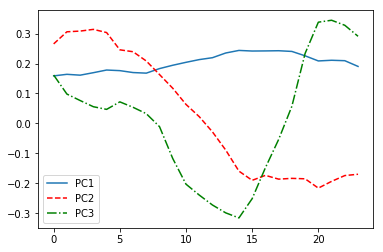

In [12]:
# 先處理遺失值
data_dropna = data.dropna()
# 製作一個 complete transformation 的 PCA
pca_pm25 = PCA(n_components=24)
pca_pm25.fit(data_dropna.iloc[:,4:])
# 先來看看前三個主成分（PC1, PC2, PC3）長什麼樣子
plt.plot(pca_pm25.components_[0], label='PC1')
plt.plot(pca_pm25.components_[1], 'r--', label='PC2')
plt.plot(pca_pm25.components_[2], 'g-.', label='PC3')
plt.legend()
plt.show()

## How Many PCs Do We Need?

把原本的24個座標軸，旋轉到新的24個座標軸，是完整的（complete）線性轉換，但是主成分分析的主要目的之一，就是希望能不需要用到24個座標軸。那麼，我們該取前幾個主成分來用呢？

由於主成分是一找「能解釋原有變異的大小」來排序的，我們可以透過觀察每個主成分的「可解釋變異量」（[`sklearn.decomposition.PCA.explained_variance_ratio_`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)）和「累積可解釋變異量」，來決定最後取用的主成分個數。

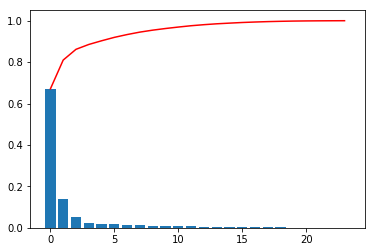

In [13]:
# np.cumsum(X) will calculate the cumulative sum of X
plt.bar(range(24),pca_pm25.explained_variance_ratio_)
plt.plot(np.cumsum(pca_pm25.explained_variance_ratio_), 'r-')
plt.show()

## A Few Rules about the Number of PCs to Use

關於如何選擇恰當的主成分個數 $K$，並沒有標準答案，但一般來說有幾個來自於經驗的建議：

1. 「累積可解釋變異量」需要達到一個百分比，依應用領域和實際數據的不同，一般可能會是 60% ~ 90%
2. 個別主成分的「可解釋變異量」較前一個主成分明顯的降低，或是本身低到一個閾值以下
3. 你堅定的相信 $K$ 應該是某個數字


In [14]:
print('Ratio of Variance Explained by PCs:')
print(np.round(pca_pm25.explained_variance_ratio_, 6))
print()
print('Accumulative Ratio of Variance Explained by PCs:')
print(np.round(np.cumsum(pca_pm25.explained_variance_ratio_), 6))

Ratio of Variance Explained by PCs:
[6.70923e-01 1.39083e-01 5.18950e-02 2.33720e-02 1.78200e-02 1.65150e-02
 1.35820e-02 1.18310e-02 9.41600e-03 7.91000e-03 7.01900e-03 6.38300e-03
 5.07500e-03 4.25700e-03 3.24500e-03 3.07300e-03 2.31300e-03 1.95600e-03
 1.46200e-03 1.15200e-03 7.17000e-04 4.67000e-04 3.15000e-04 2.18000e-04]

Accumulative Ratio of Variance Explained by PCs:
[0.670923 0.810006 0.861901 0.885273 0.903093 0.919608 0.93319  0.945021
 0.954437 0.962347 0.969366 0.975749 0.980823 0.985081 0.988326 0.991399
 0.993713 0.995668 0.99713  0.998283 0.999    0.999467 0.999782 1.      ]


以這個例子來說，$K$ = 2, 3, 5, 8，甚至 9, 16 都算是合理的選擇。

## How to Use the First $K$ PCs

假設我們選擇 $K$ = 3，接下來我們會做兩件事情：

1. 觀察與詮釋每個主成分的意義
2. 觀察與詮釋每個觀測在個別主成分上的投影



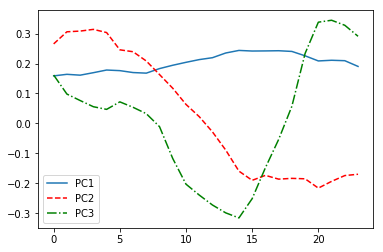

In [15]:
# 前三個主成分（PC1, PC2, PC3）
plt.plot(pca_pm25.components_[0], label='PC1')
plt.plot(pca_pm25.components_[1], 'r--', label='PC2')
plt.plot(pca_pm25.components_[2], 'g-.', label='PC3')
plt.legend()
plt.show()

[`sklearn.decomposition.PCA.fit_transform()`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)可以幫我們把資料投影到新的座標軸上。

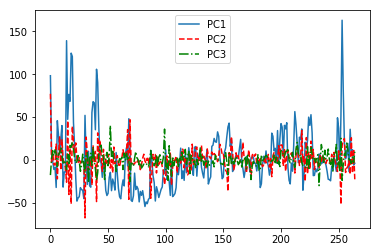

In [16]:
proj = pca_pm25.fit_transform(data_dropna.iloc[:,4:])
plt.plot(proj[:,0], label='PC1')
plt.plot(proj[:,1], 'r--', label='PC2')
plt.plot(proj[:,2], 'g-.', label='PC3')
plt.legend()
plt.show()

從這個例子裡，我們可以看到，直接使用 dropna()，會使投影後的資料不足365天，所以這個情況下，或許用某種內插來補足遺失值會是比較好的選擇。

此外，我們示範的資料，每個欄位是一個小時的觀測值，如果用上段課程的資料整理技巧，把欄位換成不同測站同時間的 PM2.5 觀測值，那麼計算出來的主成分代表的意義就會是「空間分布」而不是一日內逐時的變化。

## Summary

在這個範例中，我們簡短的介紹了主成分分析（Principle Component Analysis, PCA），並以幾個例子示範了 PCA 的用法。以下是幾點摘要：

- PCA 主要可以用來降低資料的維度：用較少的座標軸來詮釋大多數的資料變異
- PCA 的使用方式：
  - 決定 $K$
  - 詮釋主成分的意義
  - 詮釋投影的意義
- PCA 也可以視為一種「濾波」（filtering）的方式